<a href="https://colab.research.google.com/github/Ozyura1/Laprak-Semester4/blob/main/Modul_10_DKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elemen pada Graf:
Daftar Node pada Graf: ['A', 'B', 'C', 'D', 'E', 'F']
Daftar Edge pada Graf: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'F')]
Jumlah Node pada Graf 6
Jumlah Edge pada Graf 8


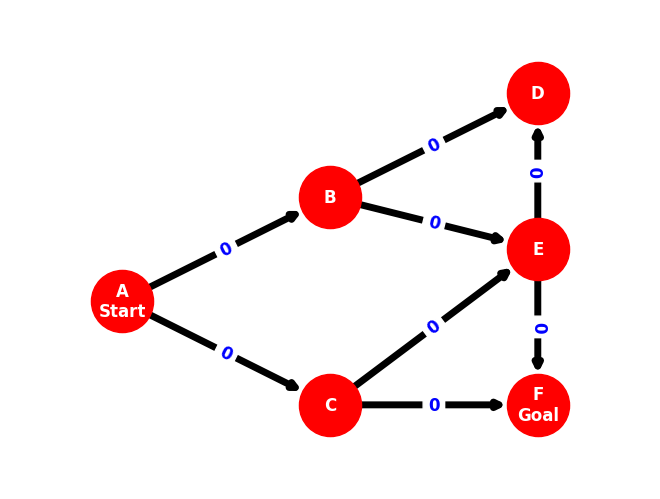

Node yang dikunjungi dari A ke F: ['A', 'C', 'F']


In [ ]:
# [1] Import library
import networkx as nx
import matplotlib.pyplot as plt

# [2] Fungsi untuk mencetak graf
def show_graph(G, pos=None, title='', labels={}):
    if pos is None:
        pos = nx.spring_layout(G)

    nx.draw(
        G,
        pos,
        with_labels=True,
        labels=labels,
        node_color='red',
        node_size=2000,
        font_color="white",
        font_weight="bold",
        width=5
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color='blue',
        font_weight="bold",
        font_size=12,
    )
    plt.margins(0.2)
    plt.title(title)
    plt.show()

# [3] Posisi node (untuk visualisasi)
pos = {
    'A': (0, 1),
    'B': (1, 2),
    'C': (1, 0),
    'D': (2, 3),
    'E': (2, 1.5),
    'F': (2, 0)
}

# [4] Membuat directed graph kosong
G = nx.DiGraph()

# [5] Menambahkan edge ke graf
edges = [
    ('A', 'B', 0), ('A', 'C', 0),
    ('B', 'D', 0), ('B', 'E', 0),
    ('C', 'E', 0), ('C', 'F', 0),
    ('E', 'D', 0), ('E', 'F', 0)
]
G.add_weighted_edges_from(edges)

# [6] Evaluasi elemen graf
print("Elemen pada Graf:")
print("Daftar Node pada Graf:", G.nodes())
print("Daftar Edge pada Graf:", G.edges())
print("Jumlah Node pada Graf", G.number_of_nodes())
print("Jumlah Edge pada Graf", G.number_of_edges())

# [7] Label node (Start dan Goal)
labels = {node: node for node in G.nodes()}
labels['A'] = 'A\nStart'
labels['F'] = 'F\nGoal'

# [8] Visualisasi graf
show_graph(G, pos=pos, labels=labels)

# [9] Fungsi heuristik untuk A*
def heuristable(a, b):
    if a == 'A':
      return 10
    elif a == 'B':
      return 2
    elif a == 'C':
      return 3
    elif a == 'D':
      return 1
    elif a == 'E':
      return 4
    elif a == 'F':
      return 0

# [10] Menentukan jalur A ke F dengan A* (UCS karena weight = 0)
path_node = nx.astar_path(G, 'A', 'F', heuristic=heuristable, weight='weight')
print("Node yang dikunjungi dari A ke F:", path_node)


Kode di atas membangun dan memvisualisasikan sebuah graf berarah (directed graph) menggunakan NetworkX dan Matplotlib, lalu mencari rute terbaik dari node 'A' (Start) ke node 'F' (Goal) menggunakan algoritma A* dengan bobot edge nol, sehingga setara dengan Uniform Cost Search (UCS). Graf didefinisikan dengan node dan edge berbobot nol, kemudian divisualisasikan dengan tata letak posisi manual, label, serta warna yang memudahkan identifikasi titik awal dan tujuan. Fungsi heuristik heuristable memberikan estimasi jarak ke tujuan dari setiap node, walaupun dalam kasus ini A* tetap akan bekerja seperti UCS karena semua bobot edge adalah nol. Hasil akhirnya mencetak elemen graf (node dan edge), menampilkan visualisasi, dan menunjukkan jalur optimal dari A ke F berdasarkan A*.

UNGUIDED 1

Jalur GBFS Eropa (Arad → Bucharest): ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']


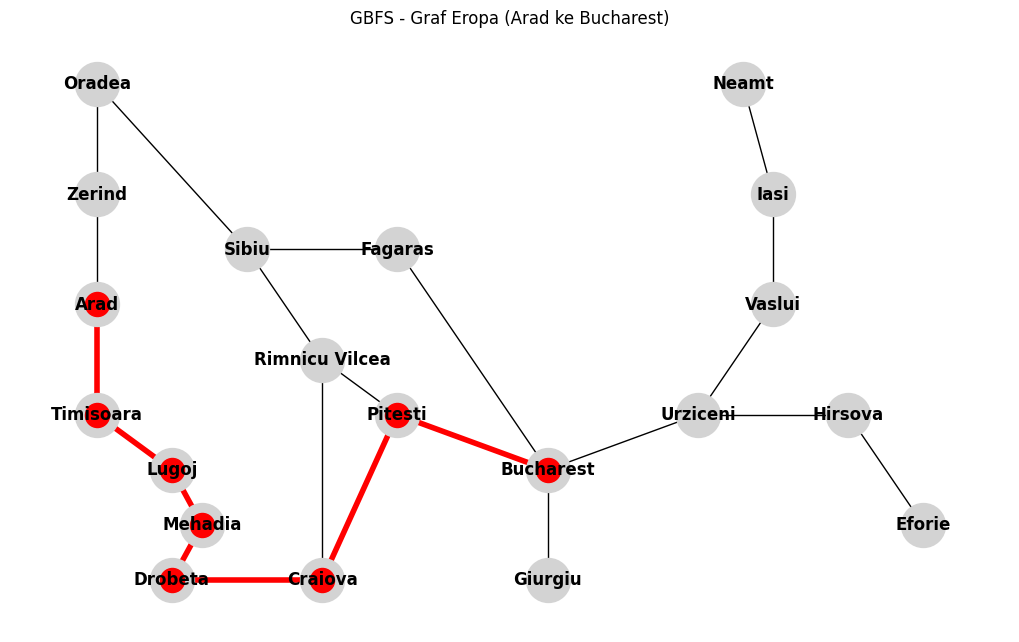

Jalur GBFS Jawa (Bandung → Malang): ['Bandung', 'Cirebon', 'Semarang', 'Surakarta', 'Malang']


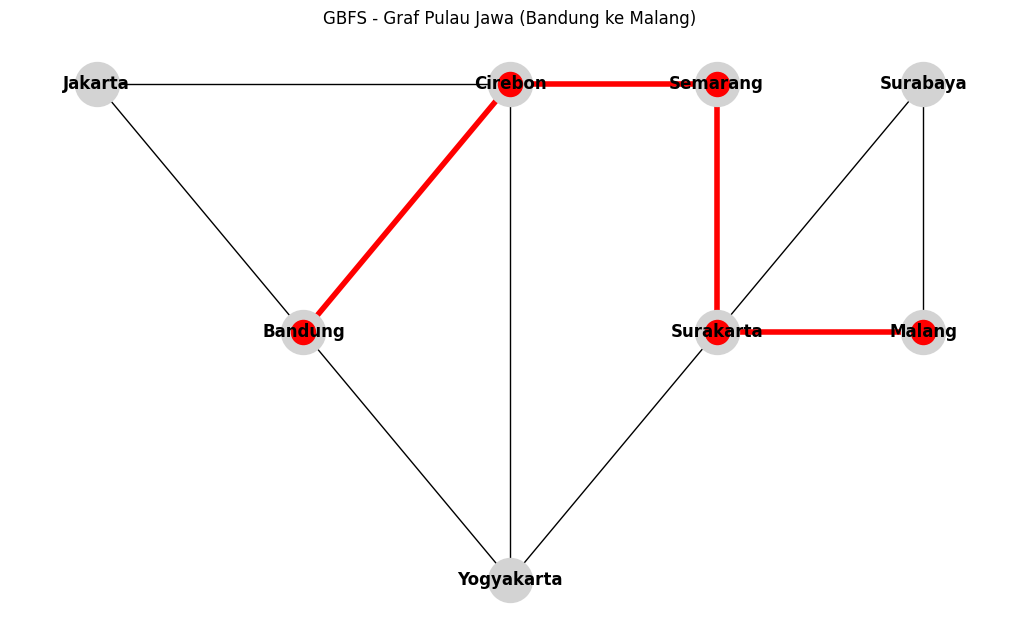

In [2]:
import networkx as nx
import math
from queue import PriorityQueue
import matplotlib.pyplot as plt

# --- FUNGSI GBFS ---
def greedy_best_first_search(G, start, goal, heuristic_func):
    visited = set()
    pq = PriorityQueue()
    pq.put((heuristic_func(start), start, [start]))

    while not pq.empty():
        _, current, path = pq.get()
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return path
        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                pq.put((heuristic_func(neighbor), neighbor, path + [neighbor]))
    return None

# --- FUNGSI VISUALISASI ---
def draw_graph(G, coords, path=None, title=''):
    pos = coords
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=1000, font_weight='bold')
    if path:
        # Garis jalur hasil pencarian
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red')
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- GRAF EROPA ---

edges_europe = [
    ("Arad", "Zerind", 75), ("Zerind", "Oradea", 71), ("Oradea", "Sibiu", 151),
    ("Arad", "Timisoara", 118), ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70), ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120), ("Craiova", "Pitesti", 138),
    ("Craiova", "Rimnicu Vilcea", 146), ("Rimnicu Vilcea", "Sibiu", 80),
    ("Sibiu", "Fagaras", 99), ("Fagaras", "Bucharest", 211),
    ("Rimnicu Vilcea", "Pitesti", 97), ("Pitesti", "Bucharest", 101),
    ("Bucharest", "Giurgiu", 90), ("Bucharest", "Urziceni", 85),
    ("Urziceni", "Hirsova", 98), ("Hirsova", "Eforie", 86),
    ("Urziceni", "Vaslui", 142), ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87)
]

coords_europe = {
    "Arad": (1, 5), "Zerind": (1, 6), "Oradea": (1, 7),
    "Sibiu": (2, 5.5), "Fagaras": (3, 5.5), "Rimnicu Vilcea": (2.5, 4.5),
    "Pitesti": (3, 4), "Timisoara": (1, 4), "Lugoj": (1.5, 3.5),
    "Mehadia": (1.7, 3), "Drobeta": (1.5, 2.5), "Craiova": (2.5, 2.5),
    "Bucharest": (4, 3.5), "Giurgiu": (4, 2.5), "Urziceni": (5, 4),
    "Hirsova": (6, 4), "Eforie": (6.5, 3), "Vaslui": (5.5, 5),
    "Iasi": (5.5, 6), "Neamt": (5.3, 7)
}

def heuristic_europe(a, b="Bucharest"):
    (x1, y1), (x2, y2) = coords_europe[a], coords_europe[b]
    return math.hypot(x2 - x1, y2 - y1)

# Buat graf Eropa
G_europe = nx.Graph()
G_europe.add_weighted_edges_from(edges_europe)
G_europe_unweighted = nx.Graph()
G_europe_unweighted.add_edges_from(G_europe.edges())

path_europe = greedy_best_first_search(G_europe_unweighted, "Arad", "Bucharest", heuristic_europe)
print("Jalur GBFS Eropa (Arad → Bucharest):", path_europe)

# Visualisasi
draw_graph(G_europe_unweighted, coords_europe, path_europe, "GBFS - Graf Eropa (Arad ke Bucharest)")

# --- GRAF JAWA ---

edges_java = [
    ("Jakarta", "Bandung", 270), ("Jakarta", "Cirebon", 327),
    ("Cirebon", "Semarang", 305), ("Bandung", "Cirebon", 120),
    ("Bandung", "Yogyakarta", 373), ("Cirebon", "Yogyakarta", 210),
    ("Semarang", "Surakarta", 97), ("Yogyakarta", "Surakarta", 60),
    ("Surakarta", "Malang", 370), ("Surakarta", "Surabaya", 369),
    ("Surabaya", "Malang", 94)
]

coords_java = {
    "Jakarta": (0, 2), "Bandung": (1, 1), "Cirebon": (2, 2),
    "Semarang": (3, 2), "Yogyakarta": (2, 0), "Surakarta": (3, 1),
    "Surabaya": (4, 2), "Malang": (4, 1)
}

def heuristic_java(a, b="Malang"):
    (x1, y1), (x2, y2) = coords_java[a], coords_java[b]
    return math.hypot(x2 - x1, y2 - y1)

# Buat graf Jawa
G_java = nx.Graph()
G_java.add_weighted_edges_from(edges_java)
G_java_unweighted = nx.Graph()
G_java_unweighted.add_edges_from(G_java.edges())

path_java = greedy_best_first_search(G_java_unweighted, "Bandung", "Malang", heuristic_java)
print("Jalur GBFS Jawa (Bandung → Malang):", path_java)

# Visualisasi
draw_graph(G_java_unweighted, coords_java, path_java, "GBFS - Graf Pulau Jawa (Bandung ke Malang)")
